In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st

housing_df = pd.read_csv('source_data/housing_data_cleaned.csv', low_memory=False)
# opa_properties = pd.read_csv('source_data/opa_properties_public_2016_2020.csv', low_memory=False)
# philadelphia_zoning_codes = pd.read_csv('source_data/philadelphia_zoning_codes.csv', low_memory=False)
# philly_demographics = pd.read_csv('source_data/philly_demographics.csv', low_memory=False)

housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124.0,RSA5


In [2]:
housing_df['sale_date'] = pd.to_datetime(housing_df['sale_date'],unit='D',origin='1900-01-01')
housing_df['sale_date'] = pd.DatetimeIndex(housing_df['sale_date']).year
housing_df['sale_date'].value_counts()

2018    23149
2017    22928
2019    22804
2016    20607
2020     9991
Name: sale_date, dtype: int64

In [3]:
sale_market = housing_df.groupby('sale_date')[['sale_price','market_value']].agg(['mean','median','max','min'])

sale_market = sale_market.rename(columns = {'sale_price':'Average Sale Price',
                                            'market_value':'Average Market Value',
                                            'mean':'Mean Price',
                                            'median':'Median Price',
                                            'max':'Largest Sale',
                                            'min':'Smallest Sale'})

sale_market = sale_market.style.format('${:,.2f}')
sale_market

In [4]:
#### Obtained from Freddie Mac website 
#### http://www.freddiemac.com/pmms/pmms30.html

interest_rates = pd.DataFrame({'sale_date':[2020,2019,2018,2017,2016],
# 'January':[3.62,4.46,4.03,4.15,3.87],
# 'February':[3.47,4.37,4.33,4.17,3.66],
# 'March':[3.45,4.27,4.44,4.2,3.69],
# 'April':[3.31,4.14,4.47,4.05,3.61],
# 'May':[3.23,4.07,4.59,4.01,3.6],
# 'June':[3.16,3.8,4.57,3.9,3.57],
# 'July':[3.02,3.77,4.53,3.97,3.44],
# 'August':[2.94,3.62,4.55,3.88,3.44],
# 'September':[2.89,3.61,4.63,3.81,3.46],
# 'October':[2.83,3.69,4.83,3.9,3.47],
# 'November':[2.77,3.7,4.87,3.92,3.77],
# 'December':[2.68,3.72,4.64,3.95,4.2],
'Annual Average':[3.11,3.94,4.54,3.99,3.65]})

interest_rates

,sale_date,Annual Average
0,2020,3.11
1,2019,3.94
2,2018,4.54
3,2017,3.99
4,2016,3.65


## Five Year Trend of Housing Sale Prices

#### We wanted to compare how the market value and sale prices changed over the last five years solely from a numbers standpoint. We had graphed this onto one plot and also superimposed the interest rate trend over the same timeframe. It appears that the median value of sale prices continued to increase over the this five year period, while the median market value proceeded to decline over that time period. 

#### The interest rate was also taken into account to see if there was a relationship there. The annual interest rate for a 30-year mortgage increased and peaked in 2018 and then decreased until 2020. This shows an interesting relationship: from 2016-2016 the sale price and interest rates increased together, while from 2018-2020 the interest rate decreased as the sale price still increased. The opposite holds true for the interest rate and market values. 

#### In summary, sale prices increased while market values decreased, while interest rates appear have little effect on sale prices and market values.

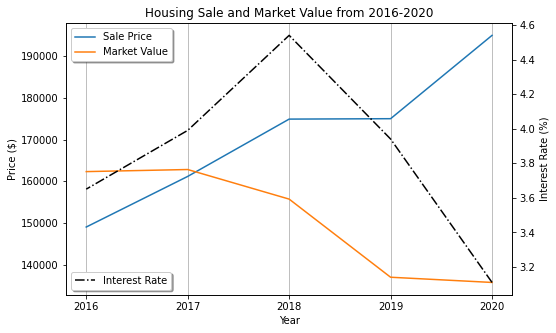

In [5]:
# Sale Price and Market Value 5 year Trends
sale_data = housing_df.groupby('sale_date')[['sale_price','market_value']].agg(['median'])
xticks = housing_df['sale_date'].unique()
ir_data = interest_rates['Annual Average']

### TWO PLOTS
# fig,ax = plt.subplots(2,figsize=(10,10))

# ax[0].plot(sale_data)
# ax[0].legend(('Sale Price', 'Market Value'), loc='upper left', shadow=True)
# ax[0].set_xlabel('Year')
# ax[0].set_ylabel('Price ($)')
# ax[0].set_title('Average Housing Sale and Market Value from 2016-2020')
# ax[0].set_xticks(xticks)

# ax[1].plot(xticks,ir_data,'k-',label='Interest Rate')
# ax[1].set_xlabel('Year')
# ax[1].set_ylabel('Interest Rate (%)')
# ax[1].set_xticks(xticks)# plt.legend(loc='upper left',shadow=True)
# plt.show()

### ONE PLOT
fig,ax1 = plt.subplots(figsize=(8,5))
ax2=ax1.twinx()

ax1.plot(sale_data, label=['Sale Price','Market Value'],ls='-')
ax1.set_xlabel('Year'), ax1.set_ylabel('Price ($)')
ax1.set_title('Housing Sale and Market Value from 2016-2020')
ax1.legend(loc='upper left',shadow=True)
ax1.grid(axis='x')

ax2.plot(xticks,ir_data,'k',label='Interest Rate',ls='-.')
ax2.set_xlabel('Year'), ax2.set_ylabel('Interest Rate (%)')
ax2.legend(loc='lower left',shadow=True)

plt.xticks(xticks)
plt.show()
fig.savefig("five_year_trends.png")

# use median, after data clean, look at mean vs median
# select range of prices for this data
# remove the max data points for millions
# filter on residential zoning code for the entire dataset

### These we don't have to use. I was more curious about the correlation between these measurements. 
### Turns out there's no correlations.

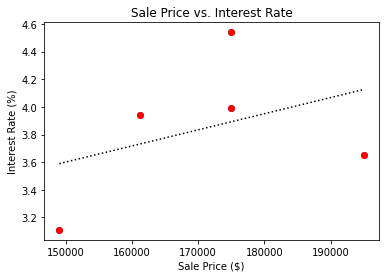

y = 0.0x + 1.85
rsquared: 0.148


In [6]:
# Linear Regression of Sale Price vs. Interest Rate
xdata = housing_df.groupby('sale_date')['sale_price'].median()
ydata = interest_rates['Annual Average']
plt.scatter(xdata,ydata)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(xdata, ydata, marker='o', facecolors='r')
plt.plot(xdata, regress_values, 'k:')
plt.title('Sale Price vs. Interest Rate')
plt.xlabel('Sale Price ($)')
plt.ylabel('Interest Rate (%)')
plt.show()
print(line_eq)
print(f'rsquared: {round(rvalue**2,3)}')

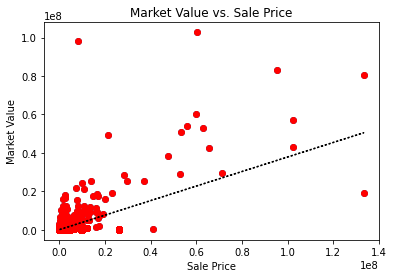

y = 0.38x + 114991.35
rsquared: 0.38


In [7]:
# Linear Regression of Sale Price vs. Market Value
xdata = housing_df['sale_price']
ydata = housing_df['market_value']
plt.scatter(xdata,ydata)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(xdata, ydata, marker='o', facecolors='r')
plt.plot(xdata, regress_values, 'k:')
plt.title('Market Value vs. Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Market Value')
plt.show()
print(line_eq)
print(f'rsquared: {round(rvalue**2,3)}')